In [2]:
#All necessary libraries to run our code.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import plotly as pl
from plotly import graph_objs as go

In [4]:
#Reading in our CSV file for the dataset
df = pd.read_csv("US_Accidents.csv")

In [6]:
df.head()

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,Source2,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,Source2,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,Source2,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,0.01,...,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,Source2,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,Source2,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,0.01,...,False,False,False,False,True,False,Day,Day,Day,Day


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7728394 entries, 0 to 7728393
Data columns (total 46 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Source                 object 
 2   Severity               int64  
 3   Start_Time             object 
 4   End_Time               object 
 5   Start_Lat              float64
 6   Start_Lng              float64
 7   End_Lat                float64
 8   End_Lng                float64
 9   Distance(mi)           float64
 10  Description            object 
 11  Street                 object 
 12  City                   object 
 13  County                 object 
 14  State                  object 
 15  Zipcode                object 
 16  Country                object 
 17  Timezone               object 
 18  Airport_Code           object 
 19  Weather_Timestamp      object 
 20  Temperature(F)         float64
 21  Wind_Chill(F)          float64
 22  Humidity(%)       

In [7]:
df.columns

Index(['ID', 'Source', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat',
       'Start_Lng', 'End_Lat', 'End_Lng', 'Distance(mi)', 'Description',
       'Street', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

In [8]:
df.shape

(7728394, 46)

Cleaning Data

In [38]:
#Searching for duplicated values
df.duplicated().sum()

0

In [39]:
df.isnull().sum()

ID                             0
Source                         0
Severity                       0
Start_Time                     0
End_Time                       0
Start_Lat                      0
Start_Lng                      0
End_Lat                  3402762
End_Lng                  3402762
Distance(mi)                   0
Description                    5
Street                     10869
City                         253
County                         0
State                          0
Zipcode                     1915
Country                        0
Timezone                    7808
Airport_Code               22635
Weather_Timestamp         120228
Temperature(F)            163853
Wind_Chill(F)            1999019
Humidity(%)               174144
Pressure(in)              140679
Visibility(mi)            177098
Wind_Direction            175206
Wind_Speed(mph)           571233
Precipitation(in)        2203586
Weather_Condition         173459
Amenity                        0
Bump      

In [40]:
#Checking for nulls
df.isna().sum().sort_values(ascending=False)

End_Lat                  3402762
End_Lng                  3402762
Precipitation(in)        2203586
Wind_Chill(F)            1999019
Wind_Speed(mph)           571233
Visibility(mi)            177098
Wind_Direction            175206
Humidity(%)               174144
Weather_Condition         173459
Temperature(F)            163853
Pressure(in)              140679
Weather_Timestamp         120228
Nautical_Twilight          23246
Civil_Twilight             23246
Sunrise_Sunset             23246
Astronomical_Twilight      23246
Airport_Code               22635
Street                     10869
Timezone                    7808
Zipcode                     1915
City                         253
Description                    5
Traffic_Signal                 0
Roundabout                     0
Station                        0
Stop                           0
Traffic_Calming                0
Country                        0
Turning_Loop                   0
No_Exit                        0
End_Time  

In [41]:
#Determine how much is actually null in the columns
round(df.isna().sum().sort_values(ascending=False) / len(df) * 100,2)

End_Lat                  44.03
End_Lng                  44.03
Precipitation(in)        28.51
Wind_Chill(F)            25.87
Wind_Speed(mph)           7.39
Visibility(mi)            2.29
Wind_Direction            2.27
Humidity(%)               2.25
Weather_Condition         2.24
Temperature(F)            2.12
Pressure(in)              1.82
Weather_Timestamp         1.56
Nautical_Twilight         0.30
Civil_Twilight            0.30
Sunrise_Sunset            0.30
Astronomical_Twilight     0.30
Airport_Code              0.29
Street                    0.14
Timezone                  0.10
Zipcode                   0.02
City                      0.00
Description               0.00
Traffic_Signal            0.00
Roundabout                0.00
Station                   0.00
Stop                      0.00
Traffic_Calming           0.00
Country                   0.00
Turning_Loop              0.00
No_Exit                   0.00
End_Time                  0.00
Start_Time                0.00
Severity

In [42]:
#Dropping a sizeable amount of data that may not be too informative for ML, comment out if you want to use these columns
df.drop(columns=['ID', 'Source', "End_Lat", "End_Lng","End_Time", "Weather_Timestamp","Zipcode","Street","Country", 'Description','Airport_Code', "Timezone"], inplace=True)

In [43]:
#Remove chance of duplicates
df.drop_duplicates(inplace=True)

In [11]:
#Converting Time figures from abject type to datetime64 type

#Personal Note: we found a odd error when converting datetime with one student only being able to work with '%Y-%m-%d %H:%M:%S' and the other only being able to work with 'ISO8601'.
### WARNING ###
#The use of 'ISO8601' allows for the graphs of severity to be generated where as '%Y-%m-%d %H:%M:%S' does not

# df['Start_Time']=pd.to_datetime(df['Start_Time'],format='%Y-%m-%d %H:%M:%S')
df['Start_Time']=pd.to_datetime(df['Start_Time'],format='ISO8601')
df['Start_Time'].dtype

dtype('<M8[ns]')

In [45]:
#Filling missing values with interpolate method
#Limit is Maximum number of consecutive NaNs to fill. Must be greater than 0.
#Solution to fill missing values rather than completely remove
df.fillna(method='ffill', limit=5, inplace=True)
df.fillna(method='bfill', limit=5, inplace=True)

In [12]:
df.isnull().sum()

ID                             0
Source                         0
Severity                       0
Start_Time                     0
End_Time                       0
Start_Lat                      0
Start_Lng                      0
End_Lat                  3402762
End_Lng                  3402762
Distance(mi)                   0
Description                    5
Street                     10869
City                         253
County                         0
State                          0
Zipcode                     1915
Country                        0
Timezone                    7808
Airport_Code               22635
Weather_Timestamp         120228
Temperature(F)            163853
Wind_Chill(F)            1999019
Humidity(%)               174144
Pressure(in)              140679
Visibility(mi)            177098
Wind_Direction            175206
Wind_Speed(mph)           571233
Precipitation(in)        2203586
Weather_Condition         173459
Amenity                        0
Bump      

In [13]:
df.columns
df.shape

(7728394, 46)

Data Columns to analyze

City,
Time,
Year


City Analysis

In [48]:
# Total number of cities
cities = df['City'].unique()
len(cities)

13678

In [49]:
# Top 5 cities for accidents are Miami, Houston, LA, Charlotte, Dallas
cities_by_accident = df['City'].value_counts()
cities_by_accident

Houston                         164857
Miami                           162548
Los Angeles                     150831
Charlotte                       133018
Dallas                          127643
                                 ...  
Mize                                 1
Diller                               1
Lime Springs                         1
District 16                          1
American Fork-Pleasant Grove         1
Name: City, Length: 13678, dtype: int64

In [50]:
cities_by_accident[:10]

Houston        164857
Miami          162548
Los Angeles    150831
Charlotte      133018
Dallas         127643
Orlando         97471
Austin          95252
Raleigh         83386
Nashville       70762
Baton Rouge     69613
Name: City, dtype: int64

In [51]:
top_10_cities = cities_by_accident.nlargest(10)
top_10_cities

Houston        164857
Miami          162548
Los Angeles    150831
Charlotte      133018
Dallas         127643
Orlando         97471
Austin          95252
Raleigh         83386
Nashville       70762
Baton Rouge     69613
Name: City, dtype: int64

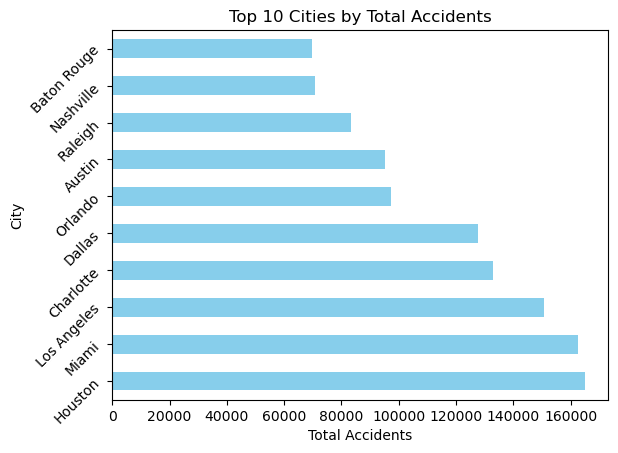

In [104]:
# Horizontal bar graph to depict the top 10 cities who have had the most accidents
top_10_cities.plot(kind='barh', x='City', y='TotalAccidents', color='skyblue')

plt.title("Top 10 Cities by Total Accidents")
plt.xlabel("Total Accidents")
plt.ylabel("City")
plt.yticks(rotation=45)
plt.xticks(rotation=0)
plt.show()

In [53]:
# Out of the top 100 cities, which had the most accidents: California, Florida, Texas as top 3 
top_100_cities = cities_by_accident[:100]
states = df[df['City'].isin(top_100_cities.index)]
states['State'].value_counts()

CA    600250
FL    481829
TX    467001
NC    217885
LA    120382
TN    117488
SC    107551
AZ     94150
NY     92299
MN     89338
GA     80005
OK     74506
MI     68856
OH     67877
VA     65814
PA     58786
MO     48430
OR     40313
WA     36985
IN     35610
IL     33781
AL     29836
CO     29411
NE     21721
KY     21237
UT     20322
DC     17649
WI     15939
NJ     10308
KS      6011
MD      1864
DE      1747
MA      1637
CT       819
MT       555
MS       513
AR       429
ME       414
NV       310
NH       178
IA       171
WV        77
VT        68
RI        24
ND        21
NM        16
SD         5
WY         3
Name: State, dtype: int64

In [14]:
states_by_accident = df['State'].value_counts()
states_by_accident

State
CA    1741433
FL     880192
TX     582837
SC     382557
NY     347960
NC     338199
VA     303301
PA     296620
MN     192084
OR     179660
AZ     170609
GA     169234
IL     168958
TN     167388
MI     162191
LA     149701
NJ     140719
MD     140417
OH     118115
WA     108221
AL     101044
UT      97079
CO      90885
OK      83647
MO      77323
CT      71005
IN      67224
MA      61996
WI      34688
KY      32254
NE      28870
MT      28496
IA      26307
AR      22780
NV      21665
KS      20992
DC      18630
RI      16971
MS      15181
DE      14097
WV      13793
ID      11376
NM      10325
NH      10213
WY       3757
ND       3487
ME       2698
VT        926
SD        289
Name: count, dtype: int64

In [16]:
top_10_states = states_by_accident.nlargest(10)

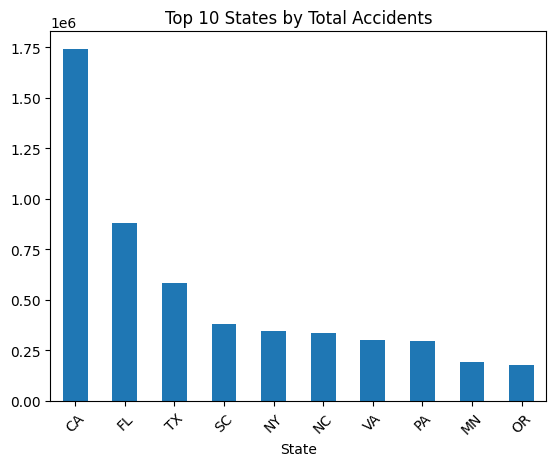

In [17]:
# Not regarding top 100 cities, California still holds a large difference in accidents compared to other states
top_10_states.plot(kind='bar')
plt.xticks(rotation=45)
plt.title("Top 10 States by Total Accidents")
plt.show()

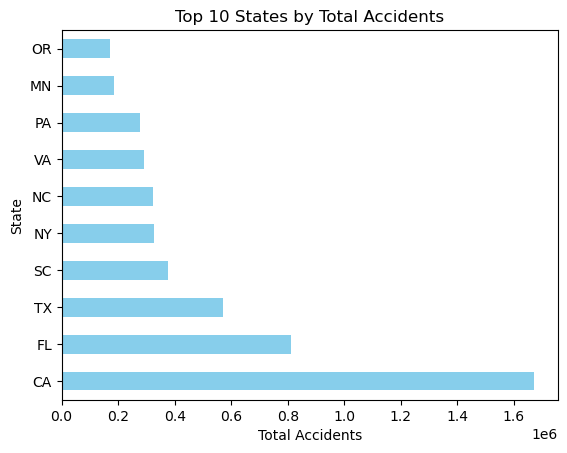

In [106]:
# Same graph as above but done horizontally to allow better readability
top_10_states.plot(kind='barh', x='State', y='TotalAccidents', color='skyblue')

plt.title("Top 10 States by Total Accidents")
plt.xlabel("Total Accidents")
plt.ylabel("State")

plt.xticks(rotation=0)

plt.show()

Time Analysis

In [18]:
df['Start_Time'].dt.year.sort_values().unique()

array([2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023])

In [19]:
df_year = df['Start_Time'].dt.year.value_counts()
df_year

Start_Time
2022    1762452
2021    1563753
2020    1178913
2019     954303
2018     893426
2017     718093
2016     410821
2023     246633
Name: count, dtype: int64

In [20]:
df_month = df['Start_Time'].dt.month.value_counts()
df_month

Start_Time
12    847343
11    760165
1     751946
10    675130
2     658984
9     651381
8     599666
4     587300
6     571373
5     558176
3     554595
7     512335
Name: count, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

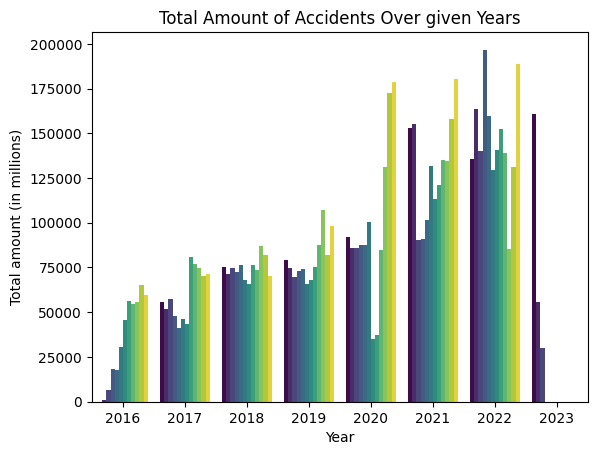

In [59]:
# Noticable spike beginning 2021-2022 possible due to the COVID pandemic lockdowns being losened
sns.countplot(x=df['Start_Time'].dt.year, data=df,palette= sns.color_palette("viridis", as_cmap = True), hue = df['Start_Time'].dt.month, legend = False )
plt.title("Total Amount of Accidents Over given Years")
plt.ylabel("Total amount (in millions)")
plt.xlabel("Year")
plt.show

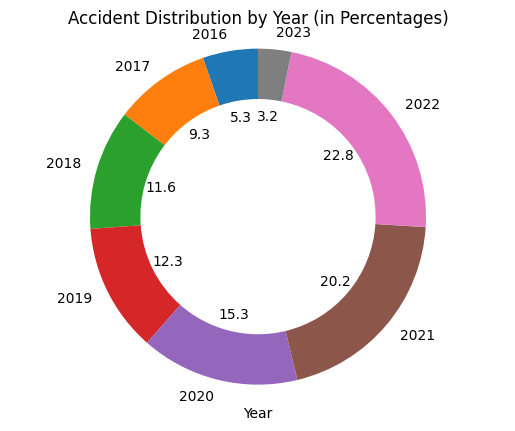

In [22]:
# Count occurrences of accidents for each year
count_by_year = df['Start_Time'].dt.year.value_counts().sort_index()

fig, ax = plt.subplots()

centre_circle = plt.Circle((0, 0), 0.70, fc='white')
ax.add_patch(centre_circle)

ax.pie(count_by_year, labels=count_by_year.index, autopct='%1.1f', startangle=90, wedgeprops=dict(width=0.3),
       textprops={'fontsize': 10}) 
ax.axis('equal')  


plt.title('Accident Distribution by Year (in Percentages)')
plt.xlabel("Year")
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

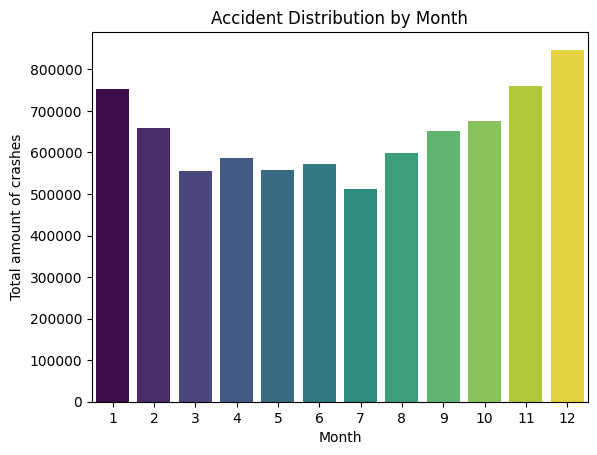

In [40]:
# December has the most accidents, winter season?

#Creation of a count plot to aggregate the number of accidents each month
sns.countplot(x=df['Start_Time'].dt.month, data=df, palette= sns.color_palette("viridis", as_cmap = True), hue = df['Start_Time'].dt.month, legend = False)
plt.ylabel("Total amount of crashes")
plt.xlabel("Month")
plt.title("Accident Distribution by Month")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

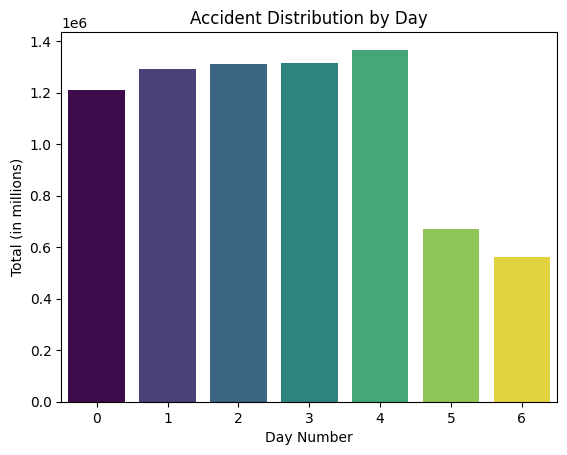

In [41]:
# Friday is highest accident rate, makes sense

#Creation of a count plot to aggregate the amount of accidents for each day
sns.countplot(x = df['Start_Time'].dt.dayofweek , data = df, palette= sns.color_palette("viridis", as_cmap = True), hue = df['Start_Time'].dt.dayofweek, legend = False)
plt.title("Accident Distribution by Day")
plt.ylabel("Total (in millions)")
plt.xlabel("Day Number")
plt.show

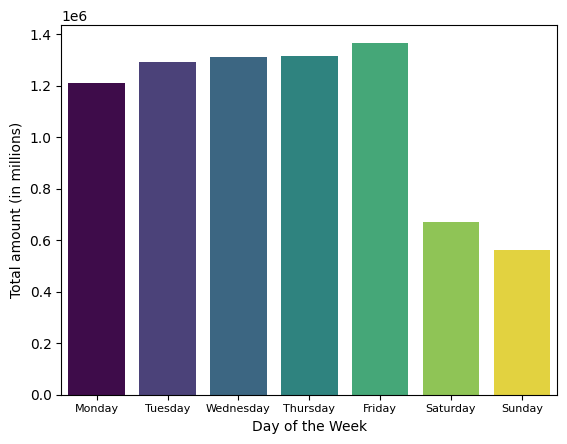

In [42]:
# Count occurrences of accidents for each day
count_by_day = df['Start_Time'].dt.dayofweek.value_counts()

# Define custom day labels
day_labels = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Plot a count plot
sns.countplot(x=df['Start_Time'].dt.dayofweek, data=df, palette= sns.color_palette("viridis", as_cmap = True), hue = df['Start_Time'].dt.dayofweek, legend = False)

# Set custom x-axis labels
plt.xticks(range(7), day_labels, fontsize=8)
plt.ylabel("Total amount (in millions)")
plt.xlabel("Day of the Week")
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

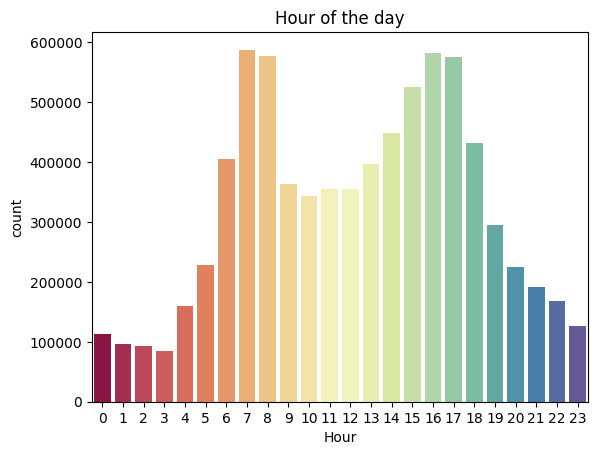

In [44]:
# 16 hour = 4pm, 7 hour is around 7am, work hours
sns.countplot(x = df['Start_Time'].dt.hour , data = df, hue = df['Start_Time'].dt.hour, palette= sns.color_palette("Spectral", as_cmap = True), legend = False )
plt.xlabel('Hour')
plt.title("Hour of the day")
plt.show

C:\Users\jelly\AppData\Local\Temp\ipykernel_17204\2485970242.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sundays_start_time['day_labels'] = pd.cut(sundays_start_time['Start_Time'].dt.hour , bins = ranges , labels = labels )
C:\Users\jelly\AppData\Local\Temp\ipykernel_17204\2485970242.py:8: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.displot(x = 'day_labels' , data =sundays_start_time , kde = False , stat='density', palette = sns.color_palette("coolwarm", as_cmap=True))


<function matplotlib.pyplot.show(close=None, block=None)>

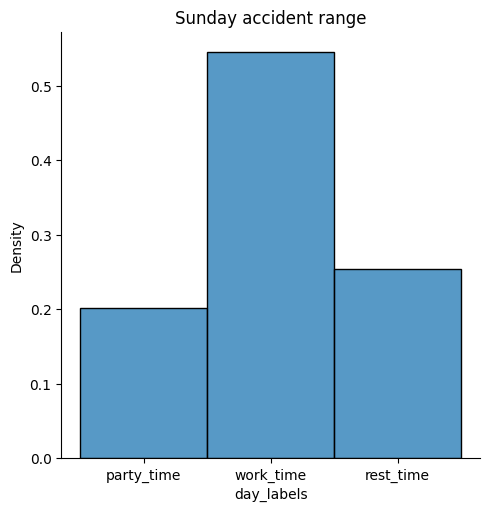

In [45]:
sundays_start_time = df[df['Start_Time'].dt.dayofweek ==6] #change certain day here, right now focuses Sunday


ranges = [0,7,17,23]
labels = ['party_time' , 'work_time' , 'rest_time']
sundays_start_time['day_labels'] = pd.cut(sundays_start_time['Start_Time'].dt.hour , bins = ranges , labels = labels )

sns.displot(x = 'day_labels' , data =sundays_start_time , kde = False , stat='density')
# sns.countplot(x = 'day_labels' , data =sundays_start_time)
plt.title('Sunday accident range')
plt.show

C:\Users\valde\AppData\Local\Temp\ipykernel_28028\382180380.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mondays_start_time['day_labels'] = pd.cut(mondays_start_time['Start_Time'].dt.hour , bins = ranges , labels = labels )


<function matplotlib.pyplot.show(close=None, block=None)>

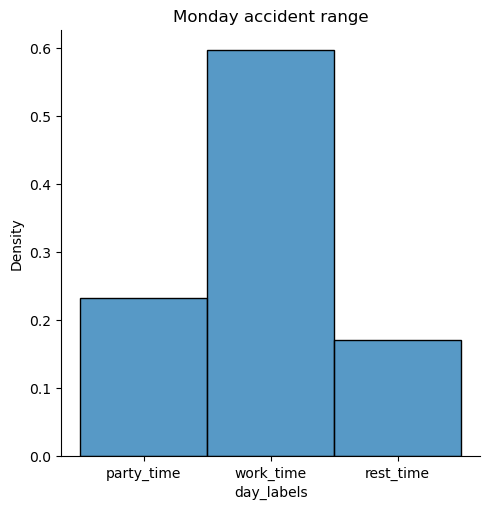

In [65]:
mondays_start_time = df[df['Start_Time'].dt.dayofweek == 0] #change certain day here, right now focuses Monday


ranges = [0,7,17,23]
labels = ['party_time' , 'work_time' , 'rest_time']
mondays_start_time['day_labels'] = pd.cut(mondays_start_time['Start_Time'].dt.hour , bins = ranges , labels = labels )

sns.displot(x = 'day_labels' , data =mondays_start_time , kde = False , stat='density')
# sns.countplot(x = 'day_labels' , data =sundays_start_time)
plt.title('Monday accident range')
plt.show

C:\Users\valde\AppData\Local\Temp\ipykernel_28028\1432613760.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mondays_start_time['day_labels'] = pd.cut(mondays_start_time['Start_Time'].dt.hour, bins=ranges, labels=labels)


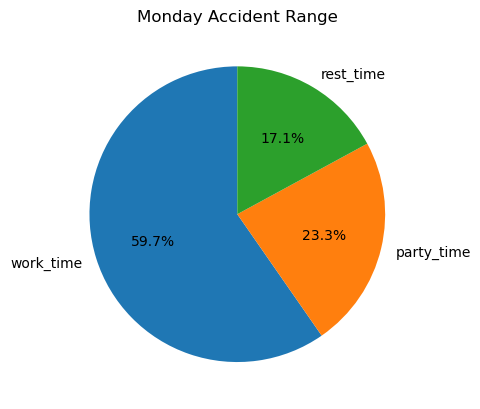

In [66]:
ranges = [0, 7, 17, 23]
labels = ['party_time', 'work_time', 'rest_time']
mondays_start_time['day_labels'] = pd.cut(mondays_start_time['Start_Time'].dt.hour, bins=ranges, labels=labels)

# Count occurrences of each category
count_by_category = mondays_start_time['day_labels'].value_counts()

# Plot a pie chart
plt.pie(count_by_category, labels=count_by_category.index, autopct='%1.1f%%', startangle=90)
plt.title('Monday Accident Range')
plt.show()

In [67]:
sample_df = df.sample(int(0.1 * len(df)))


<function matplotlib.pyplot.show(close=None, block=None)>

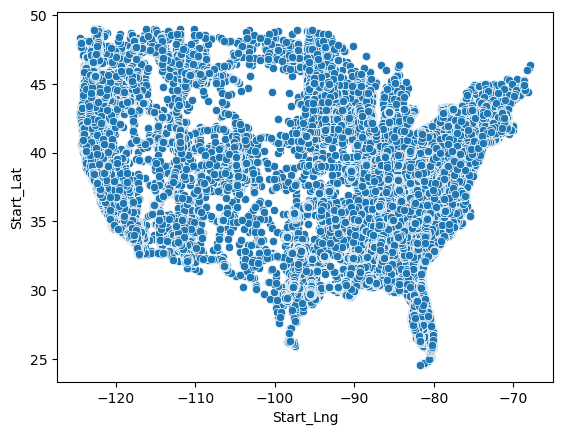

In [92]:
# Surprisingly open space in the North Dakota, lines up with it having not many ocurring accidents
# or that may be where the mountains are?
sns.scatterplot(x = sample_df.Start_Lng , y = sample_df.Start_Lat )
plt.show

In [47]:
# Serverity vs Years
df['year'] = df['Start_Time'].dt.year

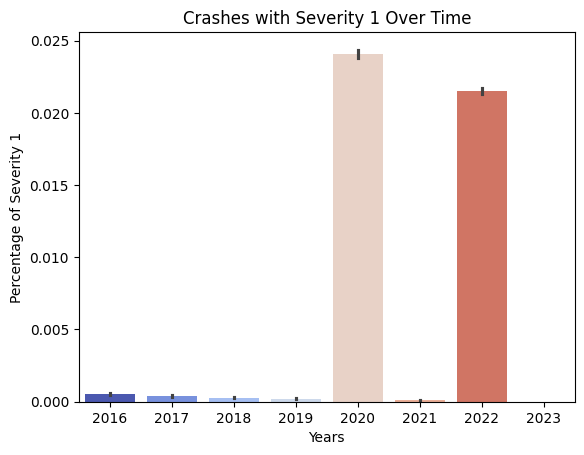

In [49]:
sns.barplot(x = df['year'], y = df['Severity'] == 1, data = df, palette = sns.color_palette("coolwarm", as_cmap=True), hue = df['year'], legend = False)
plt.title("Crashes with Severity 1 Over Time")
plt.xlabel("Years")
plt.ylabel("Percentage of Severity 1")
plt.show()

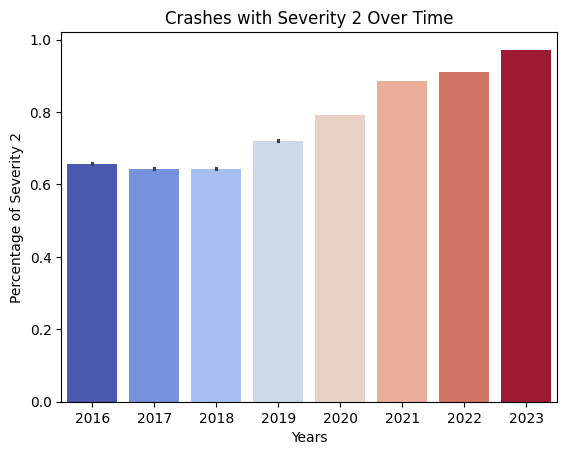

In [50]:
sns.barplot(x = df['year'], y = df['Severity'] == 2, data = df, palette = sns.color_palette("coolwarm", as_cmap=True), hue = df['year'], legend = False)
plt.title("Crashes with Severity 2 Over Time")
plt.xlabel("Years")
plt.ylabel("Percentage of Severity 2")
plt.show()

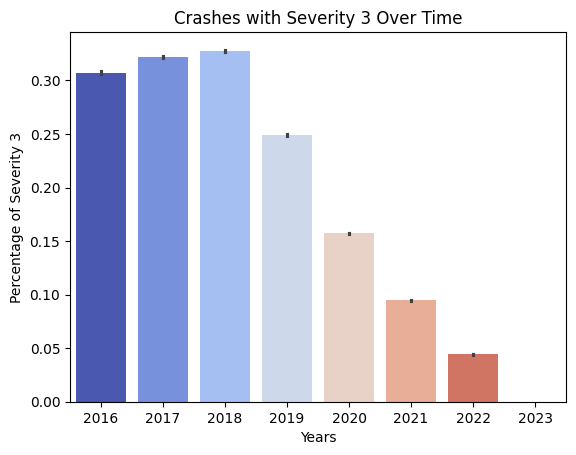

In [51]:
sns.barplot(x = df['year'], y = df['Severity'] == 3, data = df, palette = sns.color_palette("coolwarm", as_cmap=True), hue = df['year'], legend = False)
plt.title("Crashes with Severity 3 Over Time")
plt.xlabel("Years")
plt.ylabel("Percentage of Severity 3")
plt.show()

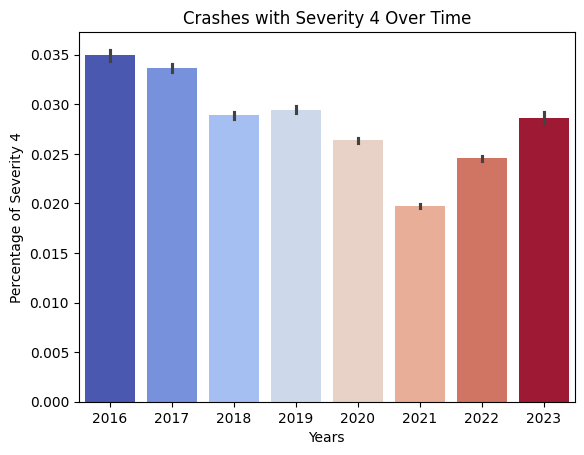

In [52]:
sns.barplot(x = df['year'], y = df['Severity'] == 4, data = df, palette = sns.color_palette("coolwarm", as_cmap=True), hue = df['year'], legend = False)
plt.title("Crashes with Severity 4 Over Time")
plt.xlabel("Years")
plt.ylabel("Percentage of Severity 4")
plt.show()

In [53]:
#Total severity levels among all the years aggregated
severityCount = df['Severity'].value_counts().reset_index()
severityCount

,Severity,count
0,2,6156981
1,3,1299337
2,4,204710
3,1,67366


,Severity,count
0,2,270026
1,3,126215
2,4,14355
3,1,225


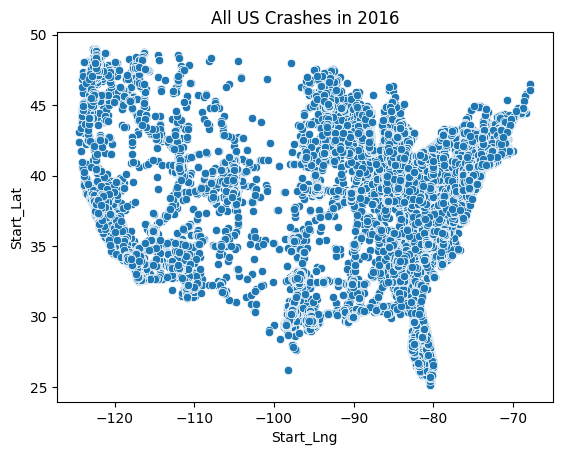

In [54]:
#Graphing out the total amount of crashes in 2016 to see differences among the years during COVID
df2016_group = df[df['Start_Time'].dt.year == 2016]

sns.scatterplot(x = df2016_group.Start_Lng , y = df2016_group.Start_Lat )
plt.title("All US Crashes in 2016")
plt.show

severityCount2016 = df2016_group['Severity'].value_counts()

#Creating a table that contains the severity levels of all crashes in 2016
tableSeverity2016 = severityCount2016.reset_index()
tableSeverity2016

In [55]:
totalcrashes = df.shape[0]
total2016_crashes = df2016_group.shape[0]

#Percentage of crashes in 2016 to total
percentage2016 = total2016_crashes / totalcrashes
print(round(percentage2016, 4))

0.0532


,Severity,count
0,2,934123
1,3,185352
2,4,31067
3,1,28371


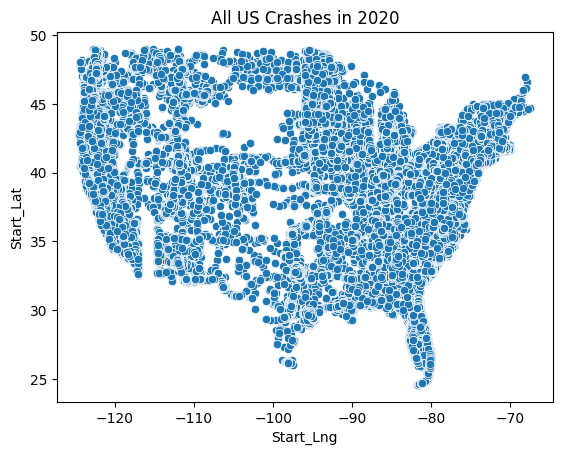

In [56]:
#Graphing out the total amount of crashes in 2020 to see differences from 2016 since it is during COVID
df2020_group = df[df['Start_Time'].dt.year == 2020]

sns.scatterplot(x = df2020_group.Start_Lng , y = df2020_group.Start_Lat )
plt.title("All US Crashes in 2020")
plt.show

severityCount2020 = df2020_group['Severity'].value_counts()

#Creating a table that contains the severity levels of all crashes in 2016
tableSeverity2020 = severityCount2020.reset_index()
tableSeverity2020

In [57]:
totalcrashes = df.shape[0]
total2020_crashes = df2020_group.shape[0]

#Percentage of crashes in 2020 to total
percentage2020 = total2020_crashes / totalcrashes
print(round(percentage2020, 4))


0.1525


,Severity,count
0,2,1384628
1,3,148085
2,4,30889
3,1,151


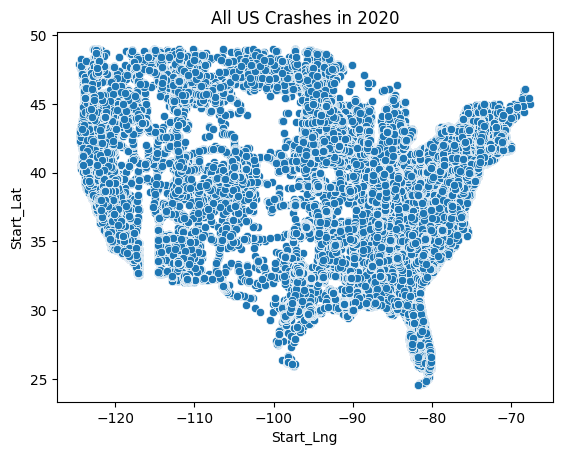

In [58]:
#Graphing out the total amount of crashes in 2021 to see the differences post-COVID lockdown 
df2021_group = df[df['Start_Time'].dt.year == 2021]

sns.scatterplot(x = df2021_group.Start_Lng , y = df2021_group.Start_Lat )
plt.title("All US Crashes in 2020")
plt.show

severityCount2021 = df2021_group['Severity'].value_counts()

tableSeverity2021 = severityCount2021.reset_index()
tableSeverity2021

In [ ]:
totalcrashes = df.shape[0]
total2021_crashes = df2021_group.shape[0]

#Percentage of crashes in 2021 to tota1
percentage2021 = total2021_crashes / totalcrashes
print(round(percentage2021, 4))


0.1988


In [ ]:
Severity2_Compare2016_2020 = severityCount2020[2] / severityCount2016[2]
#The multiplier of 2016 to 2020 in terms of Severity level 2 crashes
print(round(Severity2_Compare2016_2020, 4))

Severity2_Compare2020_2021 = severityCount2020[1] / severityCount2021[1]
#The multiplier of 2021 to 2020 in terms of Severity level 2 crashes
print(round(Severity2_Compare2020_2021, 4))

print("The multiplier of 2020 to 2021 in terms of total crashes")
print(round(percentage2021 / percentage2020, 4))

print("The multiplier of 2016 to 2020 in terms of total crashes")
print(round(percentage2020 / percentage2016, 4))

3.1093
170.7333
The multiplier of 2020 to 2021 in terms of total crashes
1.3741
The multiplier of 2016 to 2020 in terms of total crashes
2.6154


In [ ]:
#Depiction of the heat map and its interactable, showing the amount of crashes per state aggregated over the dataset's time period (early 2016 - early 2023)
state_counts = df["State"].value_counts()
fig = go.Figure(data=go.Choropleth(locations=state_counts.index, z=state_counts.values.astype(float), locationmode="USA-states", colorscale="turbo"))
fig.update_layout(title_text="Total Amount of Accidents by State", geo_scope="usa")
fig.show()

C:\Users\jelly\AppData\Local\Temp\ipykernel_17204\2130405427.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfCaliCrashes['Start_Time']=pd.to_datetime(dfCaliCrashes['Start_Time'],format='ISO8601')


Text(0.5, 0, 'Years')

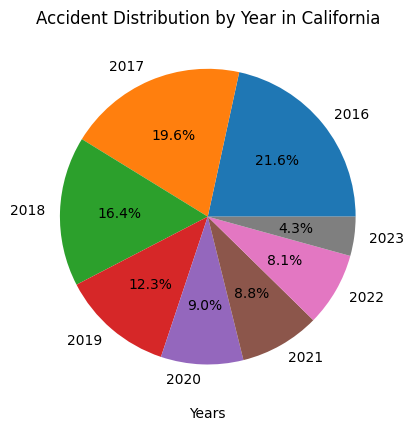

In [60]:
#Displaying the crashes occurred in California over the dataset's time period to see the impacts of COVID
    #All pie charts down below are for referencing differences in the state's crashes and their percentages pre, during and post COVID pandemic
dfCaliCrashes = df[df['State'] == 'CA']

dfCaliCrashes['Start_Time']=pd.to_datetime(dfCaliCrashes['Start_Time'],format='ISO8601')

labels = [2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023]

plt.pie(dfCaliCrashes['Start_Time'].dt.year.value_counts(), labels =  labels, autopct = '%1.1f%%')
plt.title("Accident Distribution by Year in California")
plt.xlabel("Years")

C:\Users\jelly\AppData\Local\Temp\ipykernel_17204\2967977907.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfTexasCrashes['Start_Time']=pd.to_datetime(dfTexasCrashes['Start_Time'],format='ISO8601')


Text(0.5, 0, 'Years')

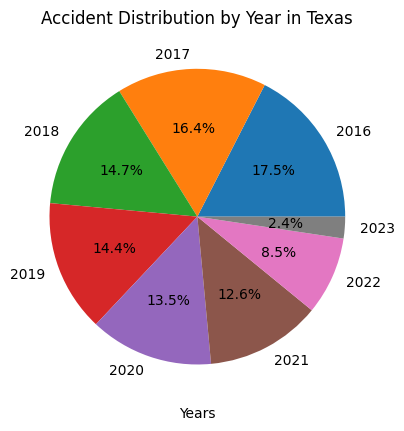

In [62]:
#Displaying the crashes occurred in Texas over the dataset's time period to see the impacts of COVID
dfTexasCrashes = df[df['State'] == 'TX']

dfTexasCrashes['Start_Time']=pd.to_datetime(dfTexasCrashes['Start_Time'],format='ISO8601')

labels = [2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023]

plt.pie(dfTexasCrashes['Start_Time'].dt.year.value_counts(), labels =  labels, autopct = '%1.1f%%')
plt.title("Accident Distribution by Year in Texas")
plt.xlabel("Years")

C:\Users\jelly\AppData\Local\Temp\ipykernel_17204\3174628823.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfUtahCrashes['Start_Time']=pd.to_datetime(dfUtahCrashes['Start_Time'],format='ISO8601')


Text(0.5, 0, 'Years')

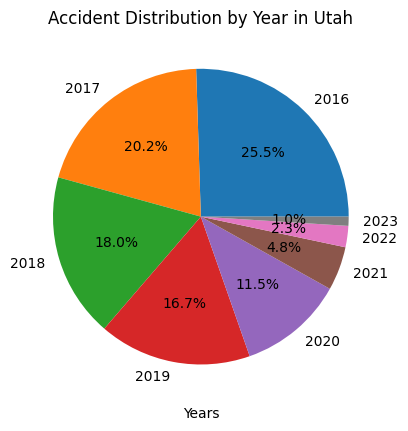

In [63]:
#Displaying the crashes occurred in Utah over the dataset's time period to see the impacts of COVID
dfUtahCrashes = df[df['State'] == 'UT']

dfUtahCrashes['Start_Time']=pd.to_datetime(dfUtahCrashes['Start_Time'],format='ISO8601')

labels = [2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023]

plt.pie(dfUtahCrashes['Start_Time'].dt.year.value_counts(), labels =  labels, autopct = '%1.1f%%')
plt.title("Accident Distribution by Year in Utah")
plt.xlabel("Years")

C:\Users\jelly\AppData\Local\Temp\ipykernel_17204\2552113090.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfUtahCrashes['Start_Time']=pd.to_datetime(dfNYCrashes['Start_Time'],format='ISO8601')


Text(0.5, 0, 'Years')

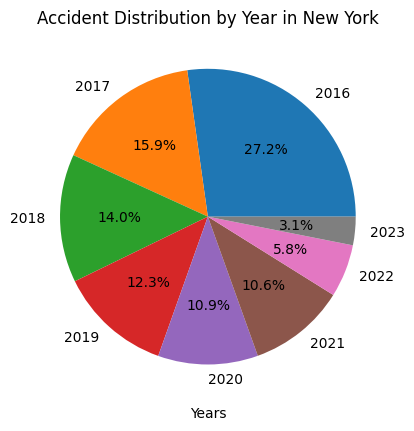

In [64]:
#Displaying the crashes occurred in New York over the dataset's time period to see the impacts of COVID
dfNYCrashes = df[df['State'] == 'NY']

dfUtahCrashes['Start_Time']=pd.to_datetime(dfNYCrashes['Start_Time'],format='ISO8601')

labels = [2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023]

plt.pie(dfNYCrashes['Start_Time'].dt.year.value_counts(), labels =  labels, autopct = '%1.1f%%')
plt.title("Accident Distribution by Year in New York")
plt.xlabel("Years")

C:\Users\jelly\AppData\Local\Temp\ipykernel_17204\1314475463.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfUtahCrashes['Start_Time']=pd.to_datetime(dfFloridaCrashes['Start_Time'],format='ISO8601')


Text(0.5, 0, 'Years')

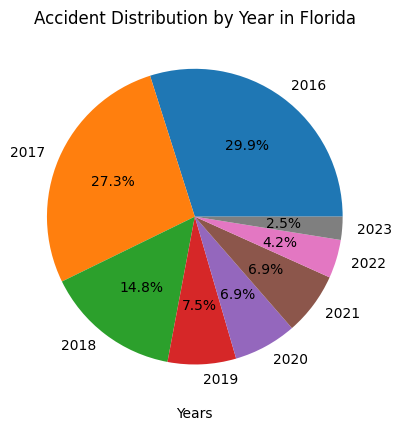

In [65]:
#Displaying the crashes occurred in Florida over the dataset's time period to see the impacts of COVID
dfFloridaCrashes = df[df['State'] == 'FL']

dfUtahCrashes['Start_Time']=pd.to_datetime(dfFloridaCrashes['Start_Time'],format='ISO8601')

labels = [2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023]

plt.pie(dfFloridaCrashes['Start_Time'].dt.year.value_counts(), labels =  labels, autopct = '%1.1f%%')
plt.title("Accident Distribution by Year in Florida")
plt.xlabel("Years")

C:\Users\jelly\AppData\Local\Temp\ipykernel_17204\1618715734.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfWyomingCrashes['Start_Time']=pd.to_datetime(dfWyomingCrashes['Start_Time'],format='ISO8601')


Text(0.5, 0, 'Years')

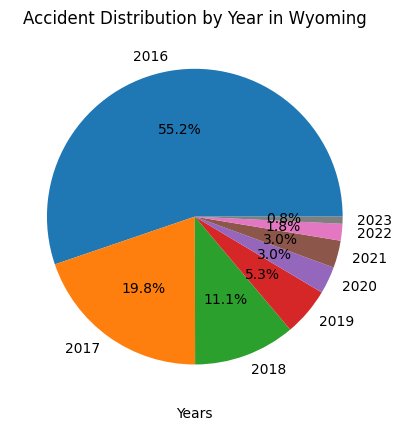

In [66]:
#Displaying the crashes occurred in Wyoming over the dataset's time period to see the impacts of COVID
dfWyomingCrashes = df[df['State'] == 'WY']

dfWyomingCrashes['Start_Time']=pd.to_datetime(dfWyomingCrashes['Start_Time'],format='ISO8601')

labels = [2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023]

plt.pie(dfWyomingCrashes['Start_Time'].dt.year.value_counts(), labels =  labels, autopct = '%1.1f%%')
plt.title("Accident Distribution by Year in Wyoming")
plt.xlabel("Years")